# CUSTOMER CHURN PREDICTION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,r2_score,precision_score,f1_score,recall_score

# Load and Explore Data

In [2]:
df=pd.read_csv("C:/Users/sujal/Downloads/Customer Churn Prediction/Churn_Modelling.csv",header=0)

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.size

140000

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.isnull().values.any()

False

In [10]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
df.index

RangeIndex(start=0, stop=10000, step=1)

In [12]:
print(df["Geography"].unique())
print(df["Gender"].unique())
print(df["NumOfProducts"].unique())
print(df["HasCrCard"].unique())
print(df["IsActiveMember"].unique())
print(df["Exited"].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']
[1 3 2 4]
[1 0]
[1 0]
[1 0]


In [13]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [14]:
df.axes

[RangeIndex(start=0, stop=10000, step=1),
 Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
        'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
        'IsActiveMember', 'EstimatedSalary', 'Exited'],
       dtype='object')]

In [15]:
df.iloc[0:4]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0


In [16]:
df.loc[:,"CustomerId"]

0       15634602
1       15647311
2       15619304
3       15701354
4       15737888
          ...   
9995    15606229
9996    15569892
9997    15584532
9998    15682355
9999    15628319
Name: CustomerId, Length: 10000, dtype: int64

# Data Visualization

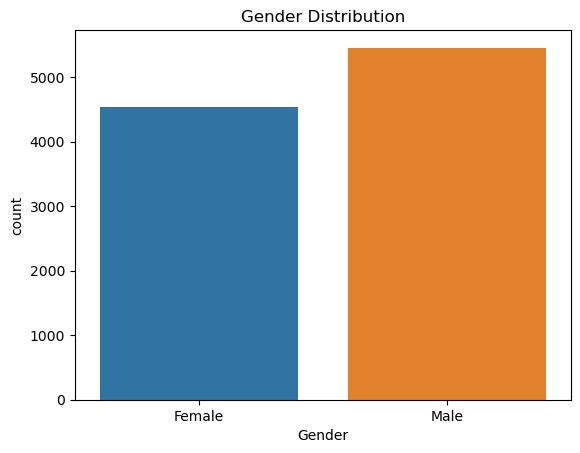

In [17]:
sns.countplot(x="Gender",data=df)
plt.title("Gender Distribution")
plt.show()

Text(0.5, 1.0, 'Geography Distribution Plot')

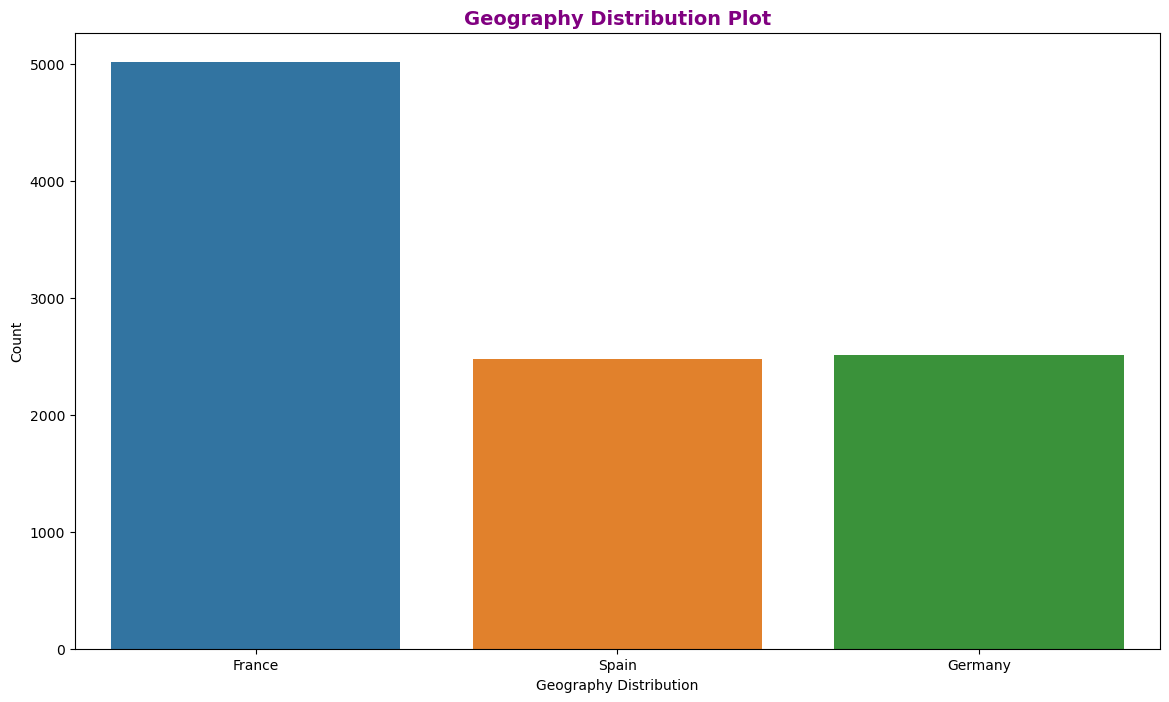

In [18]:
plt.figure(figsize=(14,8))
sns.countplot(x='Geography',data=df)
plt.xlabel("Geography Distribution")
plt.ylabel("Count")
plt.title("Geography Distribution Plot",fontsize=14,fontweight="bold",color="purple")

C:\Users\sujal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


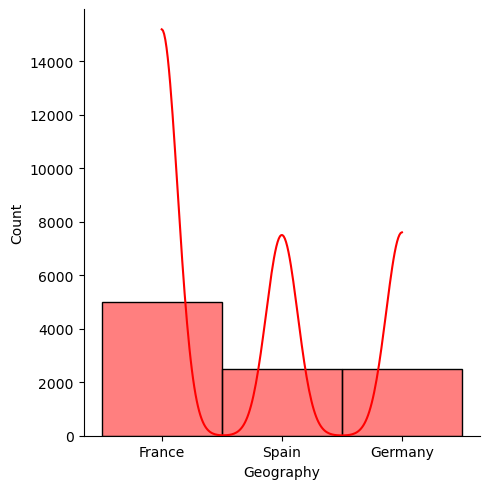

In [19]:
sns.displot(df.Geography, kde=True, color='red')

C:\Users\sujal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


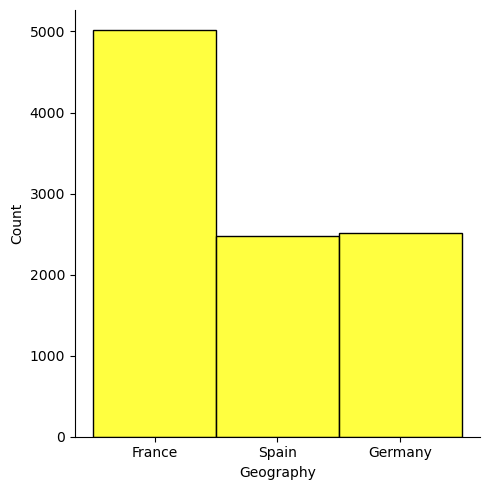

In [20]:
sns.displot(df.Geography,color='yellow')

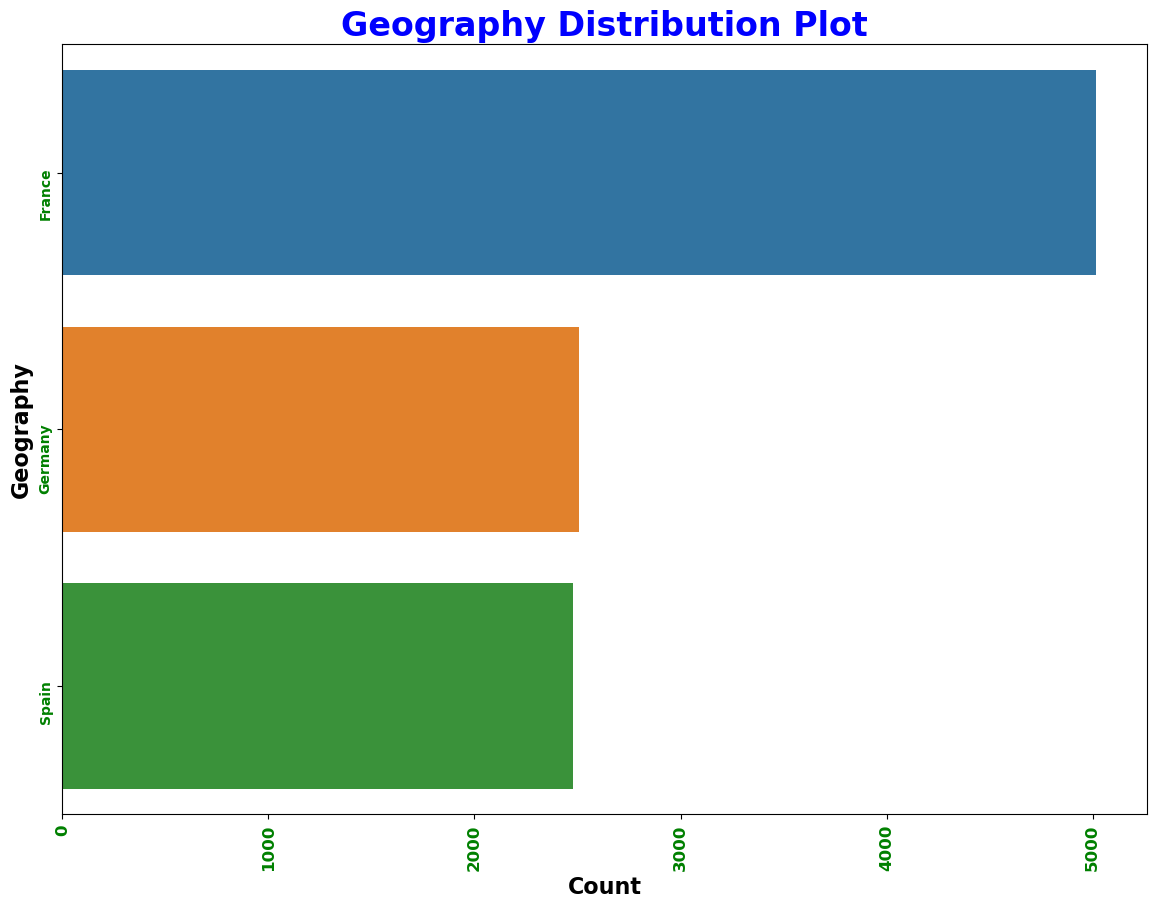

In [21]:
plt.figure(figsize=(14,10))
count1=df.Geography.value_counts()
sns.barplot(x=count1, y=count1.index, orient='h')
plt.xlabel('Count',fontsize=16,fontweight="bold")
plt.ylabel('Geography',fontsize=16,fontweight="bold")
plt.title('Geography Distribution Plot',fontsize=24,fontweight='bold',color='blue')
plt.xticks(rotation=90,fontsize=12,fontweight='bold',color='green')
plt.yticks(rotation=90,fontweight='bold',color='green')
plt.show()

In [22]:
df.drop(labels=["Surname"],axis=1,inplace=True)

In [23]:
df=pd.get_dummies(df, drop_first=True)

In [24]:
df.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


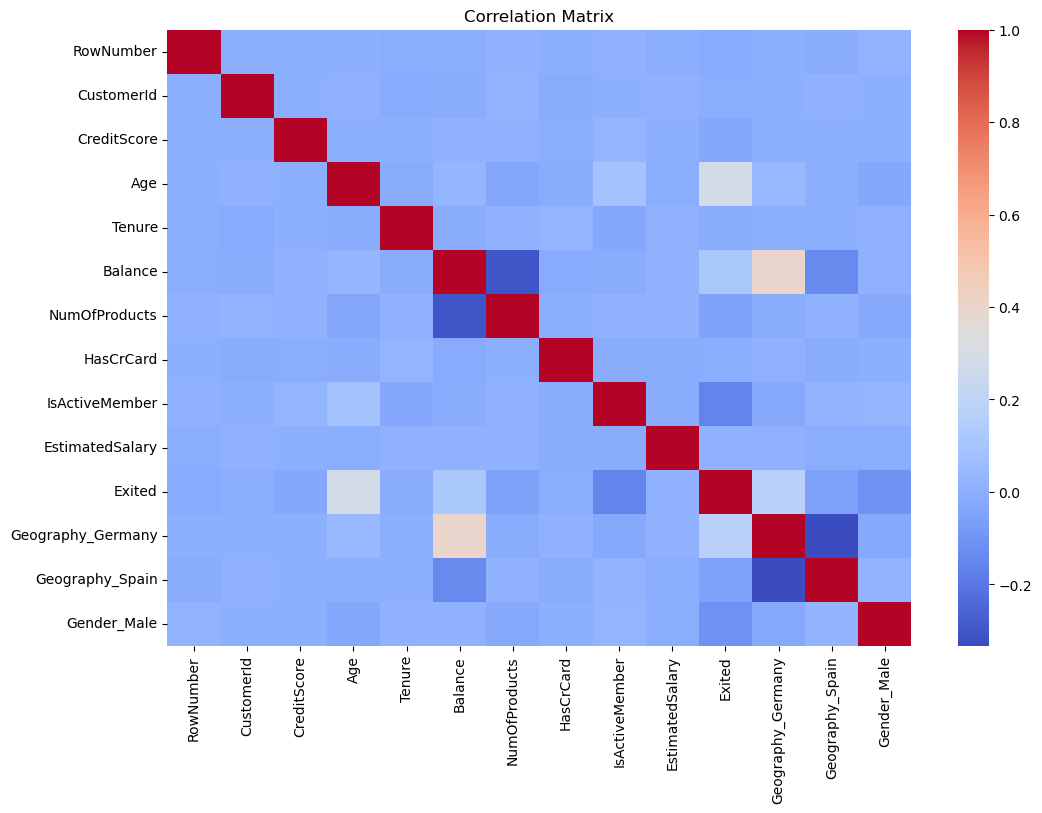

In [25]:
correlation_matrix=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [26]:
X=df.drop("Exited",axis=1)
y=df["Exited"]

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [28]:
Scaler=StandardScaler()
X_train=Scaler.fit_transform(X_train)
X_test=Scaler.fit_transform(X_test)

# Train Logistic Regression Model

In [29]:
lr_model=LogisticRegression()

In [30]:
lr_model.fit(X_train,y_train)

LogisticRegression()

In [31]:
lr_prediction=lr_model.predict(X_test)

In [32]:
print("Logistic Regression Model:")
print(confusion_matrix(y_test,lr_prediction))
print(classification_report(y_test,lr_prediction))
print("Accuracy:",accuracy_score(y_test,lr_prediction))
print("r2_score:",r2_score(y_test,lr_prediction))
print("Precision_score:",precision_score(y_test,lr_prediction))
print("Recall_score:",recall_score(y_test,lr_prediction))
print("f1_score:",f1_score(y_test,lr_prediction))

Logistic Regression Model:
[[1540   67]
 [ 311   82]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.21      0.30       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.60      2000
weighted avg       0.78      0.81      0.78      2000

Accuracy: 0.811
r2_score: -0.19705296959390473
Precision_score: 0.5503355704697986
Recall_score: 0.20865139949109415
f1_score: 0.3025830258302583


# Train Random Forest Model

In [35]:
rf_model= RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [36]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [38]:
rf_prediction=rf_model.predict(X_test)

In [40]:
print("Random Forest Classifier:")
print(confusion_matrix(y_test,lr_prediction))
print(classification_report(y_test,lr_prediction))
print("Accuracy:",accuracy_score(y_test,lr_prediction))
print("r2_score:",r2_score(y_test,lr_prediction))
print("Precision_score:",precision_score(y_test,lr_prediction))
print("Recall_score:",recall_score(y_test,lr_prediction))
print("f1_score:",f1_score(y_test,lr_prediction))

Random Forest Classifier:
[[1540   67]
 [ 311   82]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.21      0.30       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.60      2000
weighted avg       0.78      0.81      0.78      2000

Accuracy: 0.811
r2_score: -0.19705296959390473
Precision_score: 0.5503355704697986
Recall_score: 0.20865139949109415
f1_score: 0.3025830258302583


# Gradient Boosting Classifier

In [42]:
gb_model=GradientBoostingClassifier(n_estimators=1000,learning_rate=0.02,max_depth=1,random_state=42)

In [44]:
gb_model.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000,
                           random_state=42)

In [45]:
gb_prediction=gb_model.predict(X_test)

In [47]:
print("Gradient Boosting Classifier:")
print(confusion_matrix(y_test,lr_prediction))
print(classification_report(y_test,lr_prediction))
print('Accuracy:',accuracy_score(y_test,lr_prediction))
print("r2_score:",r2_score(y_test,lr_prediction))
print("Precision_score:",precision_score(y_test,lr_prediction))
print("Recall_score:",recall_score(y_test,lr_prediction))
print("f1_score:",f1_score(y_test,lr_prediction))

Gradient Boosting Classifier:
[[1540   67]
 [ 311   82]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.21      0.30       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.60      2000
weighted avg       0.78      0.81      0.78      2000

Accuracy: 0.811
r2_score: -0.19705296959390473
Precision_score: 0.5503355704697986
Recall_score: 0.20865139949109415
f1_score: 0.3025830258302583
